In [1]:
# !pip install squarify

In [2]:
import numpy as np
import pandas as pd
import functools as ft
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import squarify

In [3]:
# df_FINAL_12.to_csv('data/0-FINAL_12.csv')
# df_FINAL.to_csv('data/0-FINAL_todos.csv')
# df_ranking.to_csv('data/0-RANKING_todos.csv')
# df_ranking_12.to_csv('data/0-RANKING_12.csv')

In [4]:
pd.options.display.max_columns = None

df_FINAL_todos=pd.read_csv('data/0-FINAL_todos.csv', index_col=0)
df_FINAL_12 = pd.read_csv('data/0-FINAL_12.csv', index_col=0)
df_ranking_todos=pd.read_csv('data/0-RANKING_todos.csv', index_col=0)
df_ranking_12 = pd.read_csv('data/0-RANKING_12.csv', index_col=0)


_______________________
Nuevos DFs

In [5]:
# AMOR
df_amor_todos = df_FINAL_todos[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad','FELICIDAD','Ranking FELICIDAD','AMOR', 'Ranking AMOR', 'Parejas Viviendo Juntas (%)']].copy()
df_amor_12 = df_FINAL_12[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad','FELICIDAD','Ranking FELICIDAD','AMOR', 'Ranking AMOR', 'Parejas Viviendo Juntas (%)']].copy()

In [6]:
# DINERO
df_dinero_todos = df_FINAL_todos[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad','FELICIDAD','Ranking FELICIDAD','DINERO', 'Ranking DINERO','PIB medio ($)','Ingreso diario menor 5.5$ (%)','Indice GINI']].copy()

df_dinero_12 = df_FINAL_12[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad','FELICIDAD','Ranking FELICIDAD','DINERO', 'Ranking DINERO','PIB medio ($)','Ingreso diario menor 5.5$ (%)','Indice GINI']].copy()


In [7]:
# SALUD
df_salud_todos = df_FINAL_todos[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad', 'FELICIDAD','Ranking FELICIDAD','SALUD', 'Ranking SALUD','Esperanza de Vida media (años)','Gasto Médico Privado (%)']].copy()
df_salud_12 = df_FINAL_12[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad', 'FELICIDAD','Ranking FELICIDAD','SALUD', 'Ranking SALUD','Esperanza de Vida media (años)','Gasto Médico Privado (%)']].copy()

In [8]:
# SOCIAL
df_social_todos = df_FINAL_todos[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad','FELICIDAD','Ranking FELICIDAD','SOCIAL', 'Ranking SOCIAL','Suicidios (por 100k)','Asesinatos (por 100k)', 'Indice Libertad', 'Indice Desarrollo','Percepción Corrupción', 'Consumo de Alcohol (litros)' ]].copy()
df_social_12 = df_FINAL_12[['País','Viejo Indice Felicidad','Viejo Ranking Felicidad','FELICIDAD','Ranking FELICIDAD','SOCIAL', 'Ranking SOCIAL','Suicidios (por 100k)','Asesinatos (por 100k)', 'Indice Libertad', 'Indice Desarrollo','Percepción Corrupción', 'Consumo de Alcohol (litros)' ]].copy()

In [9]:
df_social_12.head()

,País,Viejo Indice Felicidad,Viejo Ranking Felicidad,FELICIDAD,Ranking FELICIDAD,SOCIAL,Ranking SOCIAL,Suicidios (por 100k),Asesinatos (por 100k),Indice Libertad,Indice Desarrollo,Percepción Corrupción,Consumo de Alcohol (litros)
0,Netherlands,74.27,6,91.91,1,0.95,2,8.22,0.78,1.0,0.93,83.17,9.75
1,Luxembourg,69.70,14,83.96,6,0.83,13,8.85,0.83,1.0,0.91,81.67,12.80
2,Canada,73.35,8,81.12,9,0.84,11,10.77,1.32,1.0,0.92,82.17,10.20
3,Australia,72.55,10,78.98,10,0.89,9,10.16,1.09,1.0,0.94,80.17,10.20
4,Germany,69.57,16,78.65,11,0.91,7,8.58,0.50,1.0,0.94,79.83,12.10


_____________________________________
GRAFICOS

In [10]:

# EN CASO DE QUE ALGUN VALOR SEA 0
df_FINAL_12['DINERO']=df_FINAL_12['DINERO'].apply(lambda x: x + 0.000001)

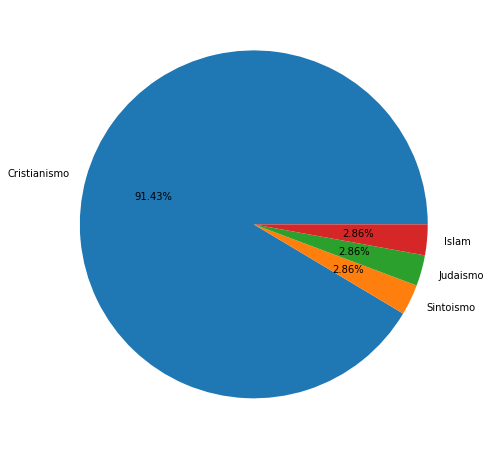

In [11]:
# RELIGION

data = df_FINAL_todos["Religión"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf();

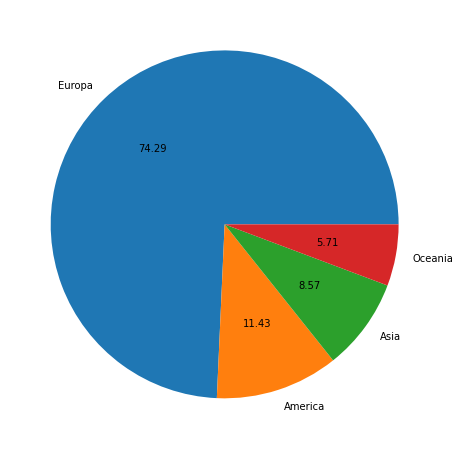

In [12]:
# CONTINENTES

data = df_FINAL_todos["Continente"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%.2f')
p=plt.gcf();

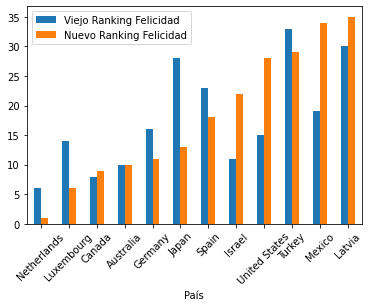

In [13]:
# Cambiar tamaño
# Invertir eje Y
# Poner valores encima de las barras

nuevo = df_FINAL_12['Ranking FELICIDAD'].values
viejo = df_FINAL_12['Viejo Ranking Felicidad'].values

# plt.figure(figsize=(12,8))
index = df_FINAL_12['País']
df = pd.DataFrame({'Viejo Ranking Felicidad': viejo,
                    'Nuevo Ranking Felicidad': nuevo,}, index=index)
ax = df.plot.bar(rot=45)


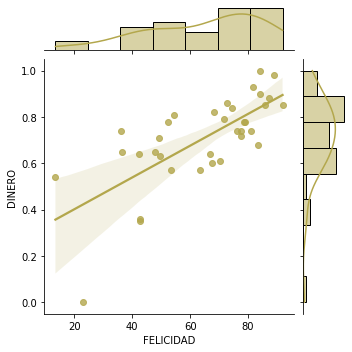

In [14]:
sns.jointplot(x=df_FINAL_todos["FELICIDAD"],
              y=df_FINAL_todos["DINERO"],
              color="#b3a74c",
              kind="reg",
              height = 5);



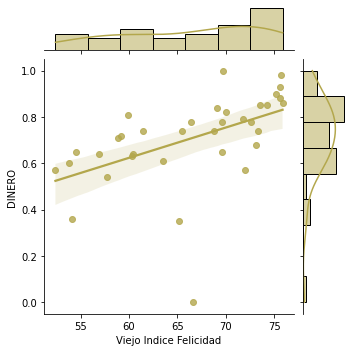

In [15]:
sns.jointplot(x=df_FINAL_todos["Viejo Indice Felicidad"],
              y=df_FINAL_todos["DINERO"],
              color="#b3a74c",
              kind="reg",
              height = 5);

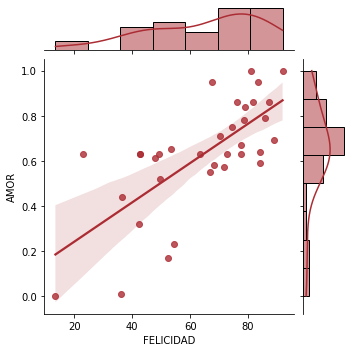

In [16]:
sns.jointplot(x=df_FINAL_todos["FELICIDAD"],
              y=df_FINAL_todos['AMOR'],
              color="#ab2c33",
              kind="reg",
              height = 5);



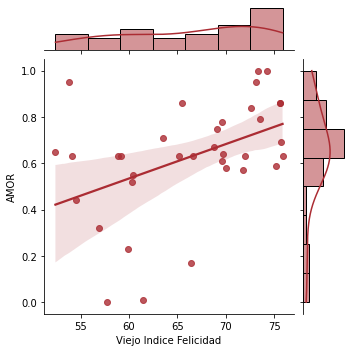

In [17]:
sns.jointplot(x=df_FINAL_todos["Viejo Indice Felicidad"],
              y=df_FINAL_todos['AMOR'],
              color="#ab2c33",
              kind="reg",
              height = 5);

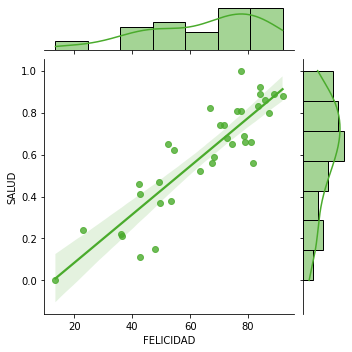

In [18]:
sns.jointplot(x=df_FINAL_todos["FELICIDAD"],
              y=df_FINAL_todos['SALUD'],
              color="#4aab2c", 
              kind="reg",
              height = 5);



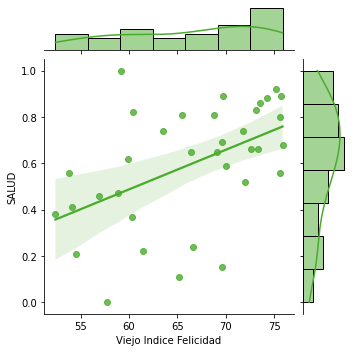

In [19]:
sns.jointplot(x=df_FINAL_todos["Viejo Indice Felicidad"],
              y=df_FINAL_todos['SALUD'],
              color="#4aab2c",
              kind="reg",
              height = 5);


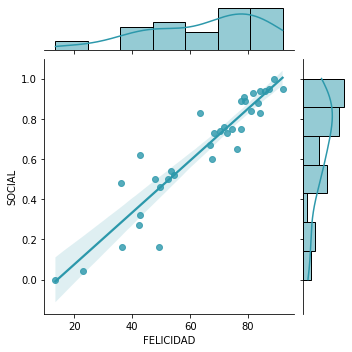

In [20]:
sns.jointplot(x=df_FINAL_todos["FELICIDAD"],
              y=df_FINAL_todos['SOCIAL'],
              color="#2c98ab",
              kind="reg",
              height = 5);



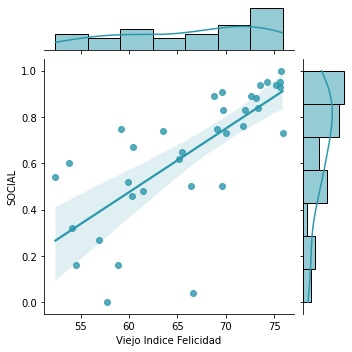

In [21]:
sns.jointplot(x=df_FINAL_todos["Viejo Indice Felicidad"],
              y=df_FINAL_todos['SOCIAL'],
              color="#2c98ab",
              kind="reg",
              height = 5);

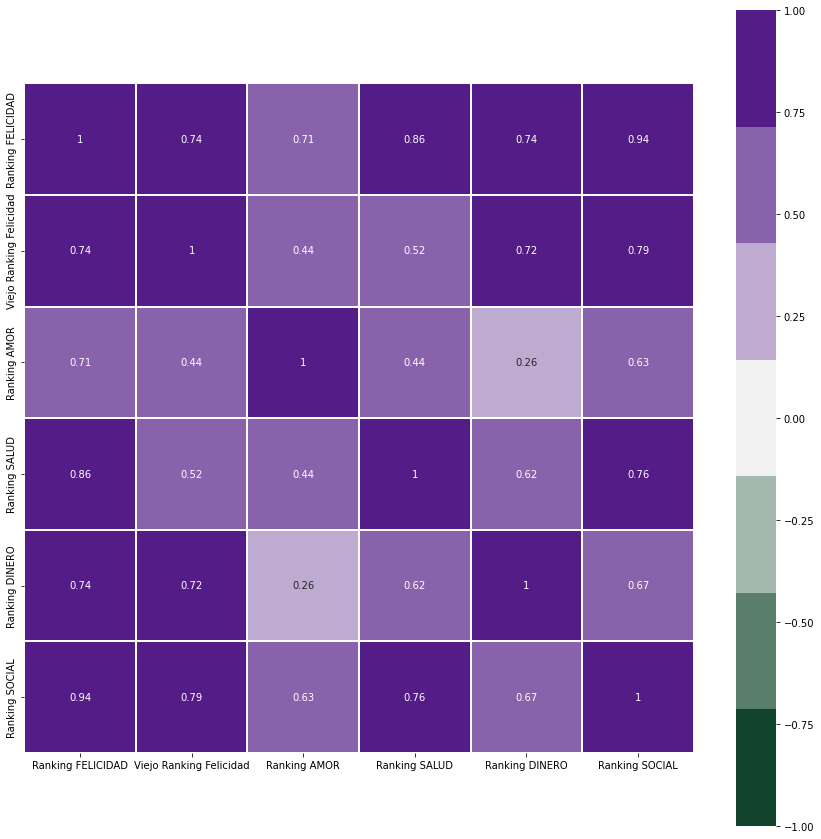

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df_ranking_todos.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

<Figure size 864x576 with 0 Axes>

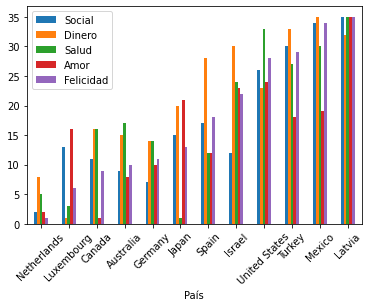

In [23]:
dinero = df_ranking_12['Ranking DINERO'].values
amor = df_ranking_12['Ranking AMOR'].values
salud = df_ranking_12['Ranking SALUD'].values
social = df_ranking_12['Ranking SOCIAL'].values
felicidad = df_ranking_12['Ranking FELICIDAD'].values

plt.figure(figsize=(12,8))
index = df_FINAL_12['País']
df = pd.DataFrame({'Social': social,
                   'Dinero': dinero,
                   'Salud': salud,
                   'Amor': amor,
                   'Felicidad': felicidad}, index=index)
ax = df.plot.bar(rot=45)

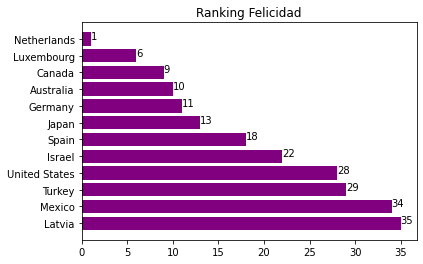

In [24]:
x = df_ranking_12['País'].values
y = df_ranking_12['Ranking FELICIDAD'].values
fig, ax = plt.subplots()
plt.barh(x, y, color='purple') 
ax.invert_yaxis()
  
for index, value in enumerate(y): 
    plt.text(value, index, 
             str(value)) 
plt.title("Ranking Felicidad")
plt.show() 

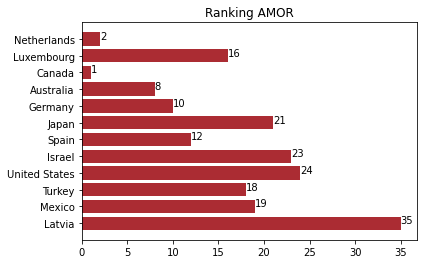

In [25]:
x = df_ranking_12['País'].values
y = df_ranking_12['Ranking AMOR'].values
fig, ax = plt.subplots()
plt.barh(x, y, color='#ab2c33') 
ax.invert_yaxis()
  
for index, value in enumerate(y): 
    plt.text(value, index, 
             str(value)) 
plt.title("Ranking AMOR")
plt.show() 


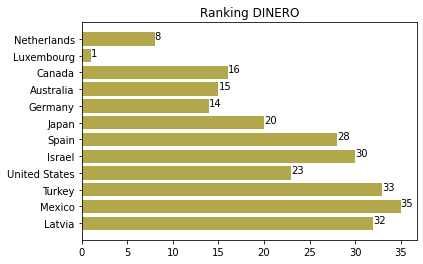

In [26]:
x1 = df_ranking_12['País'].values
y1 = df_ranking_12['Ranking DINERO'].values
fig, ax = plt.subplots()
plt.barh(x1, y1, color='#b3a74c') 
ax.invert_yaxis()
  
for index, value in enumerate(y1): 
    plt.text(value, index, 
             str(value)) 
plt.title("Ranking DINERO")
plt.show() 

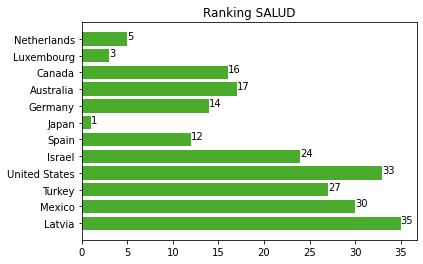

In [27]:
x1 = df_ranking_12['País'].values
y1 = df_ranking_12['Ranking SALUD'].values
fig, ax = plt.subplots()
plt.barh(x1, y1, color='#4aab2c') 
ax.invert_yaxis()
  
for index, value in enumerate(y1): 
    plt.text(value, index, 
             str(value)) 
plt.title("Ranking SALUD")
plt.show() 

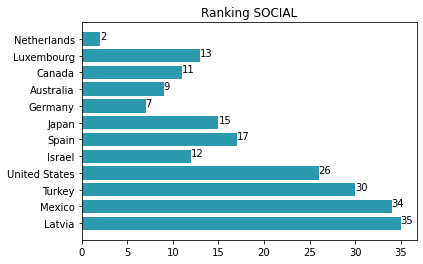

In [28]:
x1 = df_ranking_12['País'].values
y1 = df_ranking_12['Ranking SOCIAL'].values
fig, ax = plt.subplots()
plt.barh(x1, y1, color='#2c98ab') 
ax.invert_yaxis()
  
for index, value in enumerate(y1): 
    plt.text(value, index, 
             str(value)) 
plt.title("Ranking SOCIAL")
plt.show() 

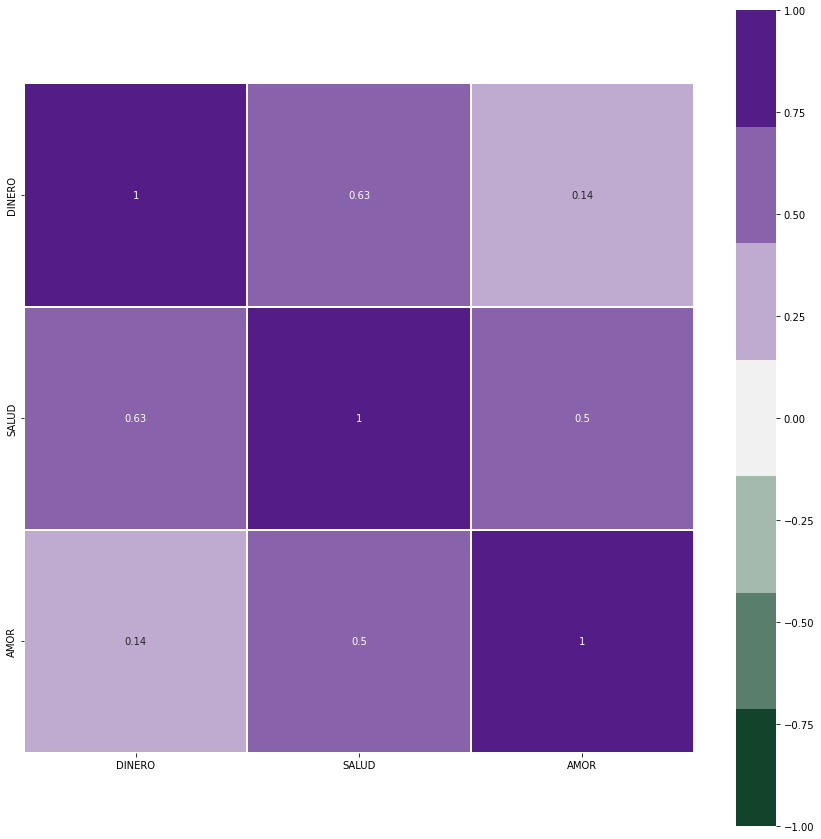

In [29]:
df_SDA = df_FINAL_todos[['País','DINERO','SALUD', 'AMOR']]


plt.figure(figsize=(15,15))
sns.heatmap(df_SDA.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

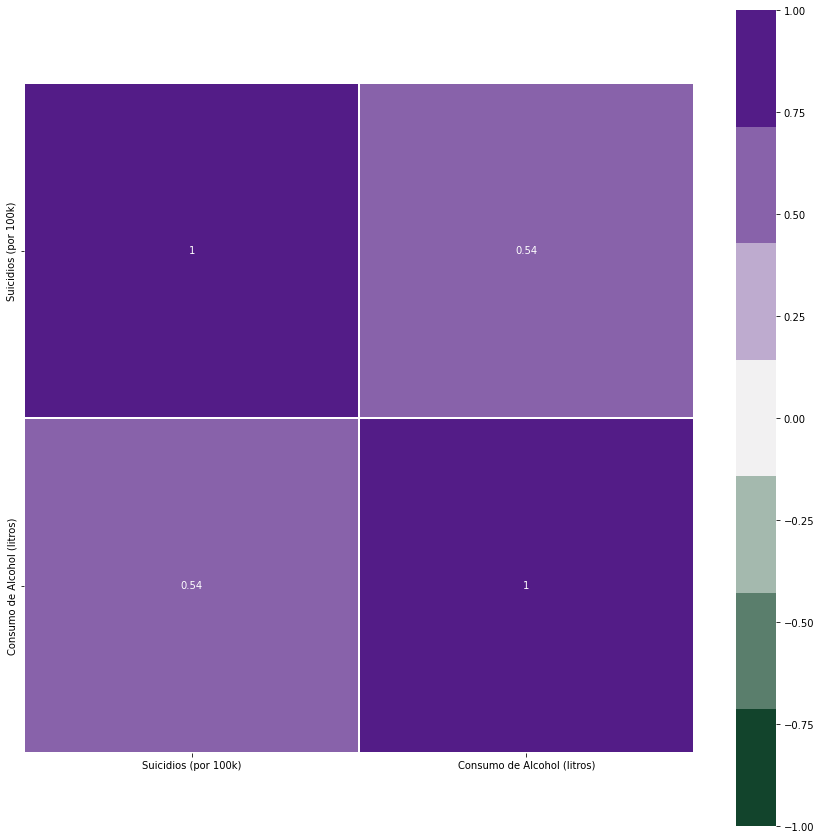

In [30]:
# Consumo de alcohol y suicidios
df_SA= df_FINAL_todos[['País','Suicidios (por 100k)','Consumo de Alcohol (litros)']]


plt.figure(figsize=(15,15))
sns.heatmap(df_SA.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);